In [2]:
import scanpy as sp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import random
import numpy as np
import umap
import os
import datetime
import torch

from plot_figure import generate_umap,\
                        generate_umap_snc,\
                        bar_plot_condition,\
                        bar_plot_location,\
                        bar_plot_age,\
                        generate_heatmap,\
                        create_summary_table

matplotlib.rcParams.update({'font.family': 'Arial'})

In [3]:
path="/bmbl_data/chenghao/sencell/hudata_data1.h5ad"
raw_adata=sp.read_h5ad(path)
# 'COL10A1' in adata.var.index

In [4]:
adata_umap=raw_adata.copy()
sp.pp.filter_cells(adata_umap, min_genes=200)
sp.pp.filter_genes(adata_umap, min_cells=3)
adata_umap_counts=adata_umap.X.copy()

# Normalize the data to 10,000 reads per cell, log-transform
sp.pp.normalize_total(adata_umap, target_sum=1e4)
sp.pp.log1p(adata_umap)

# Identify highly variable genes
sp.pp.highly_variable_genes(adata_umap, min_mean=0.0125, max_mean=3, min_disp=0.5)
# adata = adata[:, adata.var.highly_variable]

# Regress out effects of total counts per cell and the percentage of mitochondrial genes
# sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

# Scale the data
sp.pp.scale(adata_umap, max_value=10)

# Run PCA
sp.tl.pca(adata_umap, svd_solver='arpack')

# Compute the neighborhood graph
sp.pp.neighbors(adata_umap, n_neighbors=10, n_pcs=40)

# Run UMAP
sp.tl.umap(adata_umap)

In [5]:
adata_umap

AnnData object with n_obs × n_vars = 24125 × 16547
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X.1', 'X', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflamm

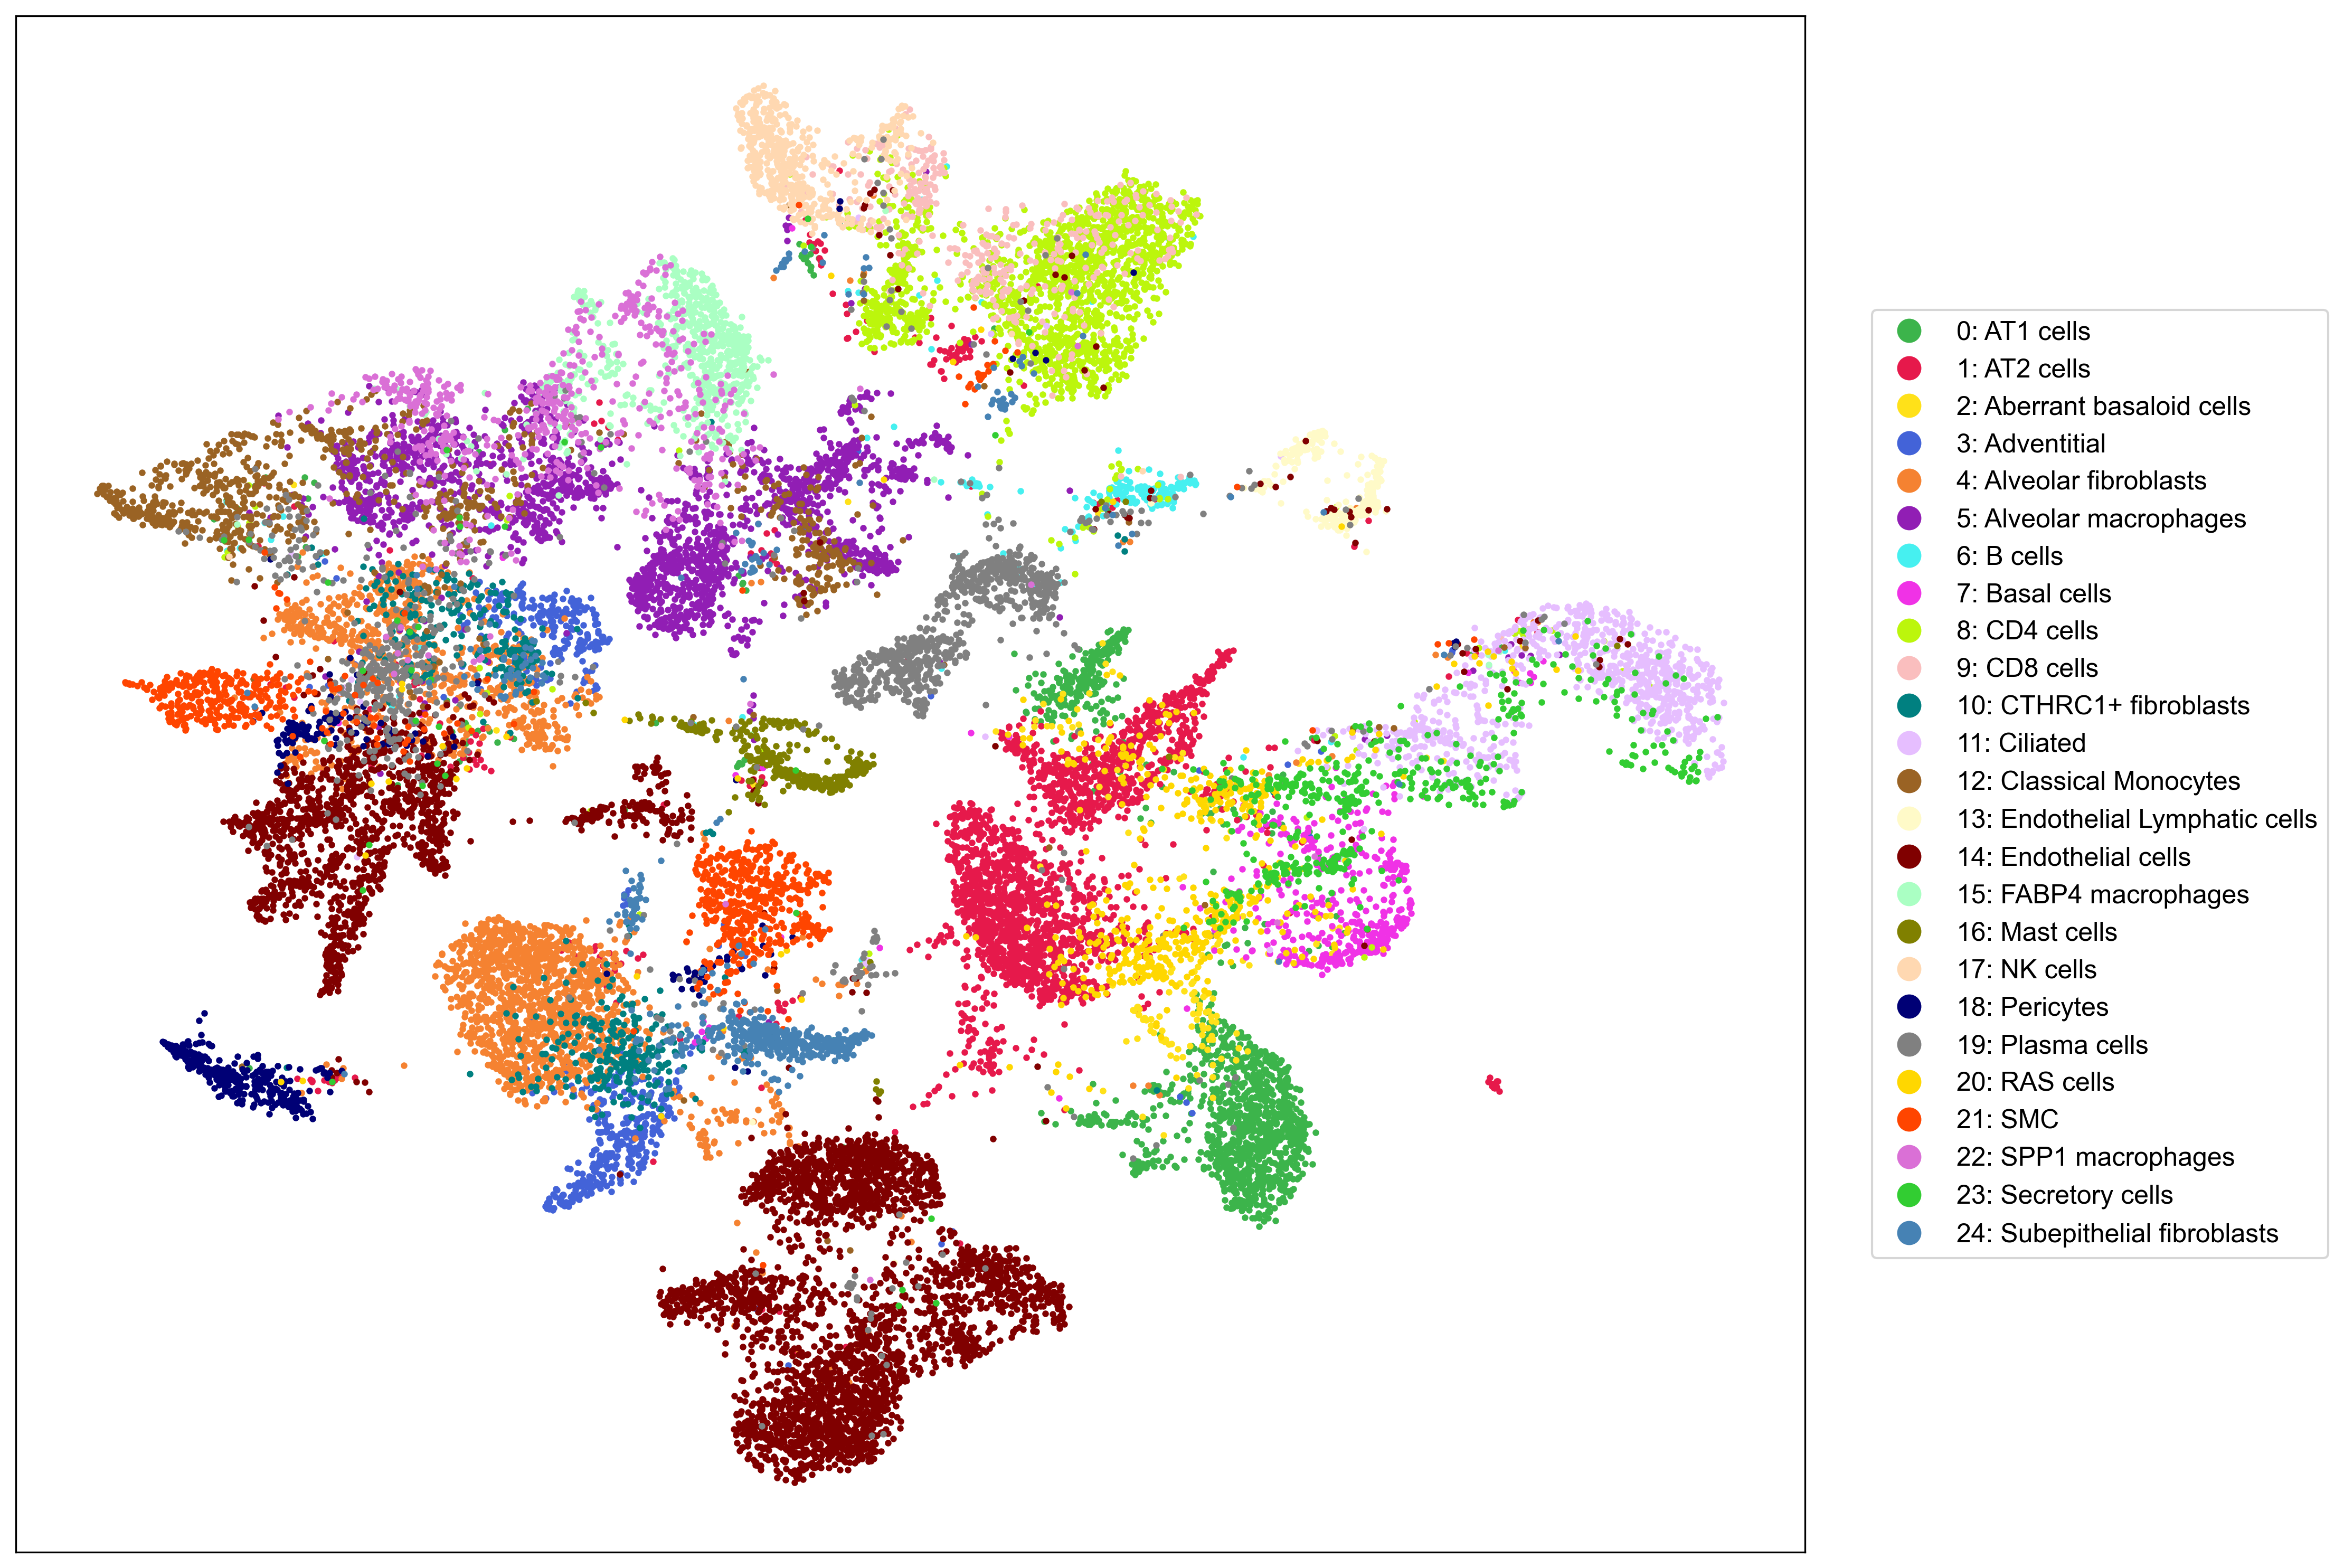

In [6]:
generate_umap(adata_umap, 'clusters')

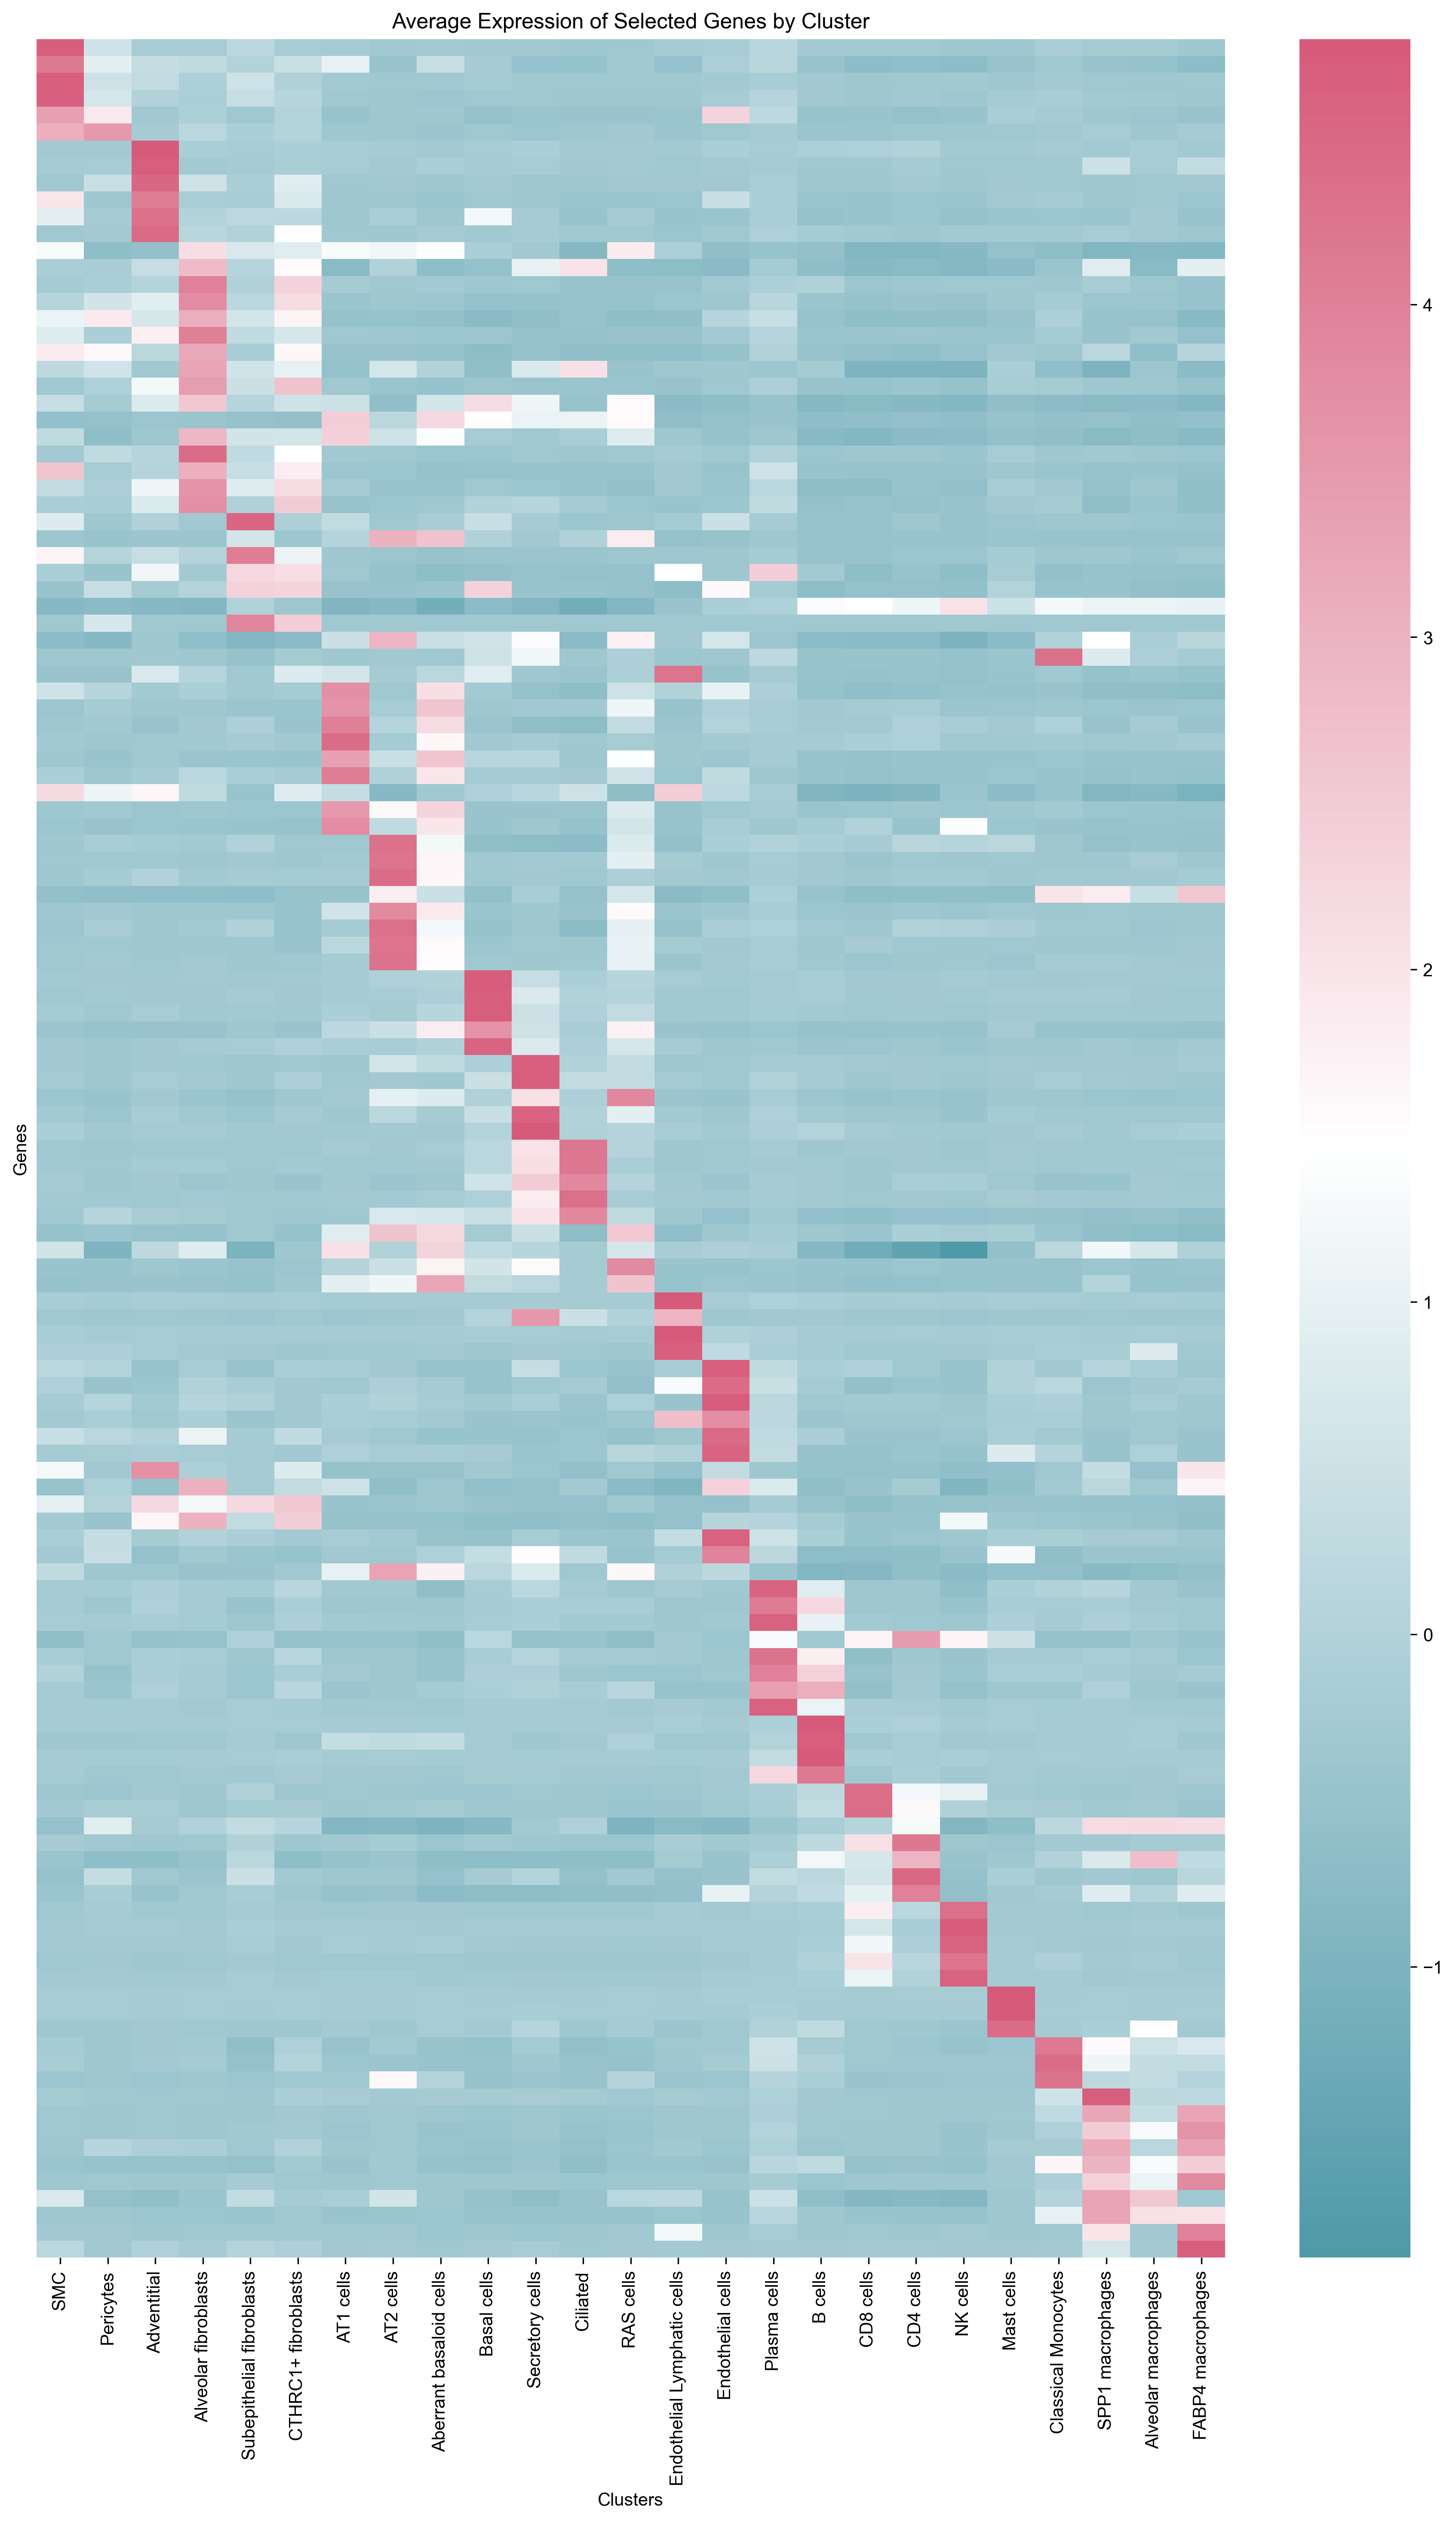

In [7]:
# Define the gene order (rows)
gene_order = [
"MYH11","MYL9","LMOD1","ACTA2","RGS5","CSPG4","PI16","MFAP5","SCARA5","PTGIS","IGFBP6","SFRP2","NPNT","CES1","WNT2","TCF21","INMT","FIBIN","AOC3","GPM6B","SCN7A","FMO2","CYP4B1","LIMCH1","FGFR4","ITGA8","RARRES2","GPC3","FGF18","WIF1","ASPN","CTHRC1","POSTN","TGFB1","COL10A1","CXCL2","CXCL8","PDPN","CAV1","CLIC5","AGER","RTKN2","GPRC5A","EMP2","IGFBP7","CLDN18","CLIC3","SFTPC","LAMP3","HHIP","SERPINA1","NAPSA","SFTPA2","ABCA3","PGC","TP63","KRT5","KRT17","CDH3","S100A2","MUC5B","SCGB1A1","SCGB3A2","SCGB3A1","MUC5AC","FOXJ1","TMEM190","CAPS","HYDIN","TPPP3","SFTPB","CDKN1A","MMP7","GDF15","CCL21","TFF3","MMRN1","LYVE1","DKK2","PLA1A","VIPR1","CLDN5","GJA5","PLVAP","CPE","RGCC","COL1A1","PTGDS","CLEC14A","HEY1","VWA1","IGLC1","IGHG1","JCHAIN","TNFRSF18","IGKC","IGHA1","IGHM","MZB1","MS4A1","BANK1","CD19","CD79A","CD8A","GZMK","CD4","CD40LG","IL2RA","FOXP3","IL7R","TRDC","KLRF1","KLRD1","NKG7","GNLY","KIT","CPA3","FCER1A","S100A9","S100A8","CSF3R","SPP1","MARCO","C1QA","APOE","IFI30","MSR1","MERTK","CD163","FABP4","INHBA"
]

# Define the cluster order (columns)
cluster_order = [
    "SMC", "Pericytes", "Adventitial", "Alveolar fibroblasts",
    "Subepithelial fibroblasts", "CTHRC1+ fibroblasts", "AT1 cells", "AT2 cells",
    "Aberrant basaloid cells", "Basal cells", "Secretory cells", "Ciliated",
    "RAS cells", "Endothelial Lymphatic cells", "Endothelial cells", "Plasma cells",
    "B cells", "CD8 cells", "CD4 cells", "NK cells", "Mast cells", "Classical Monocytes",
    "SPP1 macrophages", "Alveolar macrophages", "FABP4 macrophages"
]

generate_heatmap(adata_umap,gene_order, cluster_order)